In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets

D:\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
sess = tf.Session()
iris = datasets.load_iris()
x_vals = np.array([[x[0], x[3]] for x in iris.data])
y_vals = np.array([1 if y == 0 else -1 for y in iris.target])

In [3]:
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))
x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]

In [4]:
batch_size = 100
x_data = tf.placeholder(shape=[None, 2], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[2, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model_output = tf.subtract(tf.matmul(x_data, A), b)

In [7]:
l2_norm = tf.reduce_mean(tf.square(A))
alpha = tf.constant([0.1])
classification_term = tf.reduce_mean(tf.maximum(0.0, tf.subtract(1.0, tf.multiply(model_output, y_target))))
loss = tf.add(classification_term, tf.multiply(alpha, l2_norm))

In [8]:
prediction = tf.sign(model_output)
accuracy = tf.reduce_mean(tf.cast(tf.equal(prediction, y_target), tf.float32))

In [9]:
my_opt = tf.train.GradientDescentOptimizer(0.01)
train_step = my_opt.minimize(loss)
init = tf.initialize_all_variables()
sess.run(init)

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [10]:
loss_vec = []
train_accuracy = []
test_accuracy = []
for i in range(500):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = x_vals_train[rand_index]
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target:rand_y})
    
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target:rand_y})
    loss_vec.append(temp_loss)
    
    train_acc_temp = sess.run(accuracy, feed_dict={x_data: x_vals_train, y_target: np.transpose([y_vals_train])})
    train_accuracy.append(train_acc_temp)
    test_acc_temp = sess.run(accuracy, feed_dict={x_data: x_vals_test, y_target: np.transpose([y_vals_test])})
    test_accuracy.append(test_acc_temp)
    
    if (i + 1) % 100 == 0:
        print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #100 A = [[ 0.05258572]
 [-0.7800536 ]] b = [[0.05032218]]
Loss = [0.5090489]
Step #200 A = [[ 0.113949 ]
 [-1.0267065]] b = [[-0.02887781]]
Loss = [0.46670628]
Step #300 A = [[ 0.13536495]
 [-1.2488419 ]] b = [[-0.10057779]]
Loss = [0.30655482]
Step #400 A = [[ 0.18147103]
 [-1.4388392 ]] b = [[-0.17507775]]
Loss = [0.32201537]
Step #500 A = [[ 0.19068317]
 [-1.5904344 ]] b = [[-0.24107778]]
Loss = [0.35197163]


In [11]:
[[a1], [a2]] = sess.run(A)
[[b]] = sess.run(b)
slope = -a2 / a1
y_intercept = b / a1

x1_vals = [d[1] for d in x_vals]

best_fit = []
for i in x1_vals:
    best_fit.append(slope * i + y_intercept)

    setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == 1]
    setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == 1]
    not_setosa_x = [d[1] for i, d in enumerate(x_vals) if y_vals[i] == -1]
    not_setosa_y = [d[0] for i, d in enumerate(x_vals) if y_vals[i] == -1]

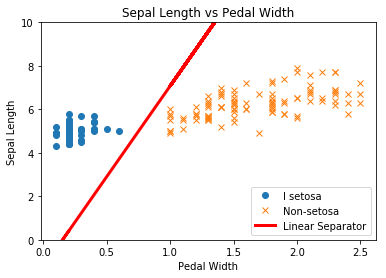

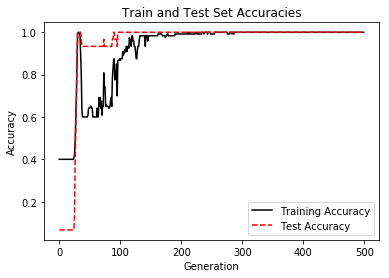

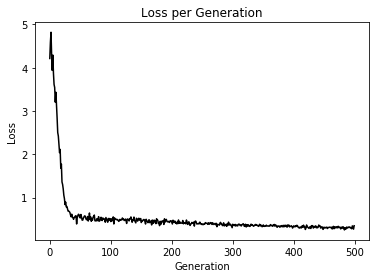

In [12]:
plt.plot(setosa_x, setosa_y, 'o', label='I setosa')
plt.plot(not_setosa_x, not_setosa_y, 'x', label='Non-setosa')
plt.plot(x1_vals, best_fit, 'r-', label='Linear Separator', linewidth=3)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

plt.plot(train_accuracy, 'k-', label='Training Accuracy')
plt.plot(test_accuracy, 'r--', label='Test Accuracy')
plt.title('Train and Test Set Accuracies')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(loss_vec, 'k-')
plt.title('Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('Loss')
plt.show()